In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [11]:
train_df = pd.read_csv('train_df.csv', index_col=0)
#train_df['positive'] = train_df['star_rating'].apply(lambda x: 1 if x > 3 else 0)
train_df.drop('star_rating', axis=1, inplace=True)
train_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,prod_review_count,prod_star_rating_mean,prod_star_rating_std,prod_total_votes_mean,prod_total_votes_std,prod_helpful_votes_mean,prod_helpful_votes_std,prod_corpus,pos_sim,neg_sim
0,1617361,849246716,1,5,5.000000,0.000000,0.200000,0.447214,0.000000,0.000000,...,297,4.872054,0.363625,0.424242,3.224979,0.37037,3.042081,brick-and-mortar usb B cabl brand insignia wes...,0.033451,0.000000
1,53052607,849246716,0,5,3.600000,0.547723,0.400000,0.894427,0.400000,0.894427,...,297,4.872054,0.363625,0.424242,3.224979,0.37037,3.042081,brick-and-mortar usb B cabl brand insignia wes...,0.012478,0.009009
2,15679577,849246716,1,8,3.375000,1.505941,7.625000,19.175412,6.500000,17.188036,...,297,4.872054,0.363625,0.424242,3.224979,0.37037,3.042081,brick-and-mortar usb B cabl brand insignia wes...,0.007220,0.033333
3,16367779,849246716,1,9,4.444444,0.527046,0.888889,1.364225,0.777778,1.092906,...,297,4.872054,0.363625,0.424242,3.224979,0.37037,3.042081,brick-and-mortar usb B cabl brand insignia wes...,0.095238,0.000000
4,25485198,849246716,1,17,5.000000,0.000000,0.235294,0.437237,0.176471,0.392953,...,297,4.872054,0.363625,0.424242,3.224979,0.37037,3.042081,brick-and-mortar usb B cabl brand insignia wes...,0.010870,0.000000


In [12]:
test_df = pd.read_csv('test_df.csv', index_col=0)
#test_df['positive'] = test_df['star_rating_x'].apply(lambda x: 1 if x > 3 else 0)
test_df.drop('star_rating', axis=1, inplace=True)
test_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,prod_review_count,prod_star_rating_mean,prod_star_rating_std,prod_total_votes_mean,prod_total_votes_std,prod_helpful_votes_mean,prod_helpful_votes_std,prod_corpus,pos_sim,neg_sim
0,36330222,986428010,1,24,4.291667,1.267629,0.541667,1.250362,0.333333,1.049500,...,18,4.333333,1.188177,0.833333,2.572479,0.722222,2.346601,come way packag market bullcrap hand though wa...,0.070423,0.012295
1,24360083,986428010,1,23,4.347826,1.191206,1.434783,2.191431,1.000000,1.537412,...,18,4.333333,1.188177,0.833333,2.572479,0.722222,2.346601,come way packag market bullcrap hand though wa...,0.095361,0.049808
2,28891040,437083384,1,10,4.500000,0.707107,0.000000,0.000000,0.000000,0.000000,...,407,4.503686,0.887439,12.356265,112.878540,10.651106,100.388954,work product proctect cover excel design color...,0.006944,0.005208
3,52449052,437083384,0,5,3.400000,1.516575,11.800000,20.789420,10.400000,18.187908,...,407,4.503686,0.887439,12.356265,112.878540,10.651106,100.388954,work product proctect cover excel design color...,0.010390,0.059514
4,27192976,437083384,1,6,4.666667,0.816497,0.500000,1.224745,0.000000,0.000000,...,407,4.503686,0.887439,12.356265,112.878540,10.651106,100.388954,work product proctect cover excel design color...,0.012942,0.003460


In [13]:
train_x, train_y = train_df.drop('positive', axis=1), train_df['positive']
test_x, test_y = test_df.drop('positive', axis=1), test_df['positive']

In [5]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
rf.score(test_x, test_y)

0.7861889250814332

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
knn.score(test_x, test_y)

0.7354614549402823

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)

ValueError: could not convert string to float: 'switch time item crossov cabl ethernet cabl cabl dongl save space bag job space bag adapt break bag size cabl s guy plug way thing switch switch link light port jack / devic plug gig- plug way thing switch switch link light port jack / devic plug fast ethernet dongl bunch cabl keyr dongl bag key ring adapt crossov T1 loopback space work bag brilliant'

In [10]:
gnb.score(train_x, train_y)

0.8009108181409448

In [11]:
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [12]:
np.shape(train_x)

(68949, 16)

In [17]:
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(16,)))
network.add(layers.Dense(128, activation='relu', input_shape=(256,)))
network.add(layers.Dense(64, activation='relu', input_shape=(128,)))
network.add(layers.Dense(32, activation='relu', input_shape=(64,)))
network.add(layers.Dense(1, activation='sigmoid', input_shape=(32,)))
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               4352      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 47,617
Trainable params: 47,617
Non-trainable params: 0
_________________________________________________________________


In [22]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

epochs = 30
history = network.fit(train_x, 
                      train_y, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_x, test_y))

Train on 68949 samples, validate on 23025 samples
Epoch 1/30
68949/68949 [==============================] - 2s 24us/step - loss: 0.4992 - accuracy: 0.8009 - val_loss: 0.5415 - val_accuracy: 0.7709
Epoch 2/30
68949/68949 [==============================] - 1s 22us/step - loss: 0.4992 - accuracy: 0.8009 - val_loss: 0.5406 - val_accuracy: 0.7709
Epoch 3/30
68949/68949 [==============================] - 2s 22us/step - loss: 0.4992 - accuracy: 0.8009 - val_loss: 0.5402 - val_accuracy: 0.7709
Epoch 4/30
68949/68949 [==============================] - 2s 22us/step - loss: 0.4993 - accuracy: 0.8009 - val_loss: 0.5414 - val_accuracy: 0.7709
Epoch 5/30
68949/68949 [==============================] - 1s 21us/step - loss: 0.4992 - accuracy: 0.8009 - val_loss: 0.5412 - val_accuracy: 0.7709
Epoch 6/30
68949/68949 [==============================] - 2s 23us/step - loss: 0.4992 - accuracy: 0.8009 - val_loss: 0.5411 - val_accuracy: 0.7709
Epoch 7/30
68949/68949 [==============================] - 2s 22us/st

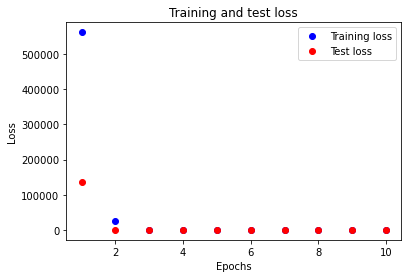

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

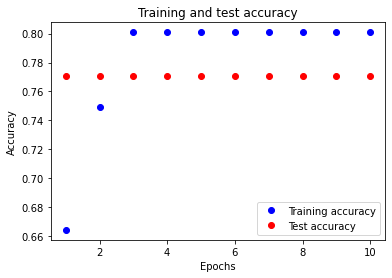

In [21]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [3]:
svd_train_df = pd.read_csv('train_raw.csv', index_col=0)
svd_train_df = pd.concat([svd_train_df, pd.read_csv('train_raw_max.csv', index_col=0)])
svd_test_df = pd.read_csv('test_raw.csv', index_col=0)
svd_test_df = pd.concat([svd_train_df, pd.read_csv('test_raw_max.csv', index_col=0)])

svd_test_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,positive,clean_review
267779,US,3387522,R2JEMKCQT9QTVM,B008SBZD5U,150118808,Kingdom Hearts HD 1.5 Remix,Video Games,4,0,0,N,Y,KH!>% RULE!,Its A pretty good game and it came on time but...,2015-02-01,1,A game time year combo set ps4
267796,US,15137367,R3IM5TXYMA7DCQ,B00IXMF5CU,292308774,Terraria - Xbox 360,Video Games,5,1,2,N,Y,Five Stars,Excellent,2015-02-01,1,excel
267818,US,15137367,R2PFXXB4EP23B,B00EM5UFEK,461081395,Plants vs. Zombies Garden Warfare,Video Games,4,0,0,N,Y,Four Stars,Excellent,2015-02-01,1,excel
267871,US,4354770,R1A9DB178PFXLH,B004OPYLTS,245894499,Fishdom - Nintendo DS,Video Games,5,0,0,N,Y,Fun Game,"Fun game, levels get harder as you progress.",2015-02-01,1,fun game level
267892,US,6698937,R1RS2GAXENP9LF,B00BGA9X9W,943154724,DualShock 4 Wireless Controller for PlayStatio...,Video Games,4,0,0,N,Y,Four Stars,Great controller,2015-02-01,1,great control


(array([ 45171.,      0.,  30979.,      0.,      0.,  56479.,      0.,
        121513.,      0., 430619.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

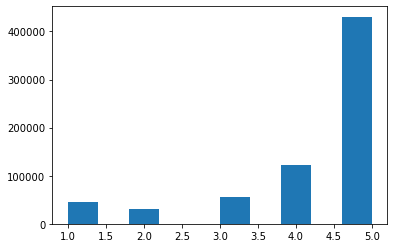

In [4]:
import matplotlib.pyplot as plt
plt.hist(svd_train_df.star_rating)

In [7]:
svd_train_df.groupby('star_rating').size()

star_rating
1     45171
2     30979
3     56479
4    121513
5    430619
dtype: int64

In [8]:
30979 * 5

154895

In [ ]:
from surprise import Dataset
from surprise import Reader

svd_train_df[['customer_id', 'product_parent', 'star_rating', 'review_date']].to_csv('svd_train_df.csv', index=False)
svd_test_df[['customer_id', 'product_parent', 'star_rating', 'review_date']].to_csv('svd_test_df.csv', index=False)

In [ ]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_folds([('svd_train_df.csv', 'svd_test_df.csv')], reader=reader)

In [ ]:
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import PredefinedKFold

pkf = PredefinedKFold()

algo = SVD()

for trainset, testset in pkf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    mean_rmse = accuracy.rmse(predictions, verbose=True)
    mean_mae = accuracy.mae(predictions, verbose=True)

In [ ]:
correct = 0
for i, row in svd_test_df.iterrows():
    uid = str(row.customer_id)
    iid = str(row.product_parent)

    # get a prediction for specific users and items.
    pred = algo.predict(uid, iid, r_ui=row.star_rating, verbose=False)
    if (round(pred.est) == row.star_rating):
        correct += 1

print('Correct: {} %: {}'.format(correct, correct / len(svd_test_df)))

In [ ]:
from surprise.model_selection import cross_validate
data2 = Dataset.load_from_file('svd_train_df.csv', reader=reader)
cross_validate(SVD(), data2, cv=5, verbose=True)

In [ ]:
from surprise.model_selection import GridSearchCV
from surprise import SVDpp
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=pkf)
gs.fit(data)

In [ ]:
print(gs.best_score['rmse'])
print(gs.best_score['mae'])